In [35]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [36]:
%load_ext autoreload
%autoreload 2
    
from Graphe import *
from Solution import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Graphe

In [37]:
G=[5, {'A', 'B', 'C', 'D', 'E'}, 8, {('A', 'B'):-1, ('A', 'C'):4, ('B', 'C'):3, ('B', 'D'):1, ('D', 'B'):2, ('B', 'E'):2, ('E', 'D'):-3, ('D', 'C'):3 }]
G

[5,
 {'A', 'B', 'C', 'D', 'E'},
 8,
 {('A', 'B'): -1,
  ('A', 'C'): 4,
  ('B', 'C'): 3,
  ('B', 'D'): 1,
  ('D', 'B'): 2,
  ('B', 'E'): 2,
  ('E', 'D'): -3,
  ('D', 'C'): 3}]

## Question 1

Exemple d'exécution de l'algorithme de Bellman Ford

In [38]:
G, arborescence, k = bellmanFord(G, 'A')

print("Arborescence: ", arborescence)
print("Nombre d'itérations avant convergence: ", k)

Arborescence:  {('A', 'B'): -1, ('D', 'C'): 3, ('E', 'D'): -3, ('B', 'E'): 2}
Nombre d'itérations avant convergence:  2


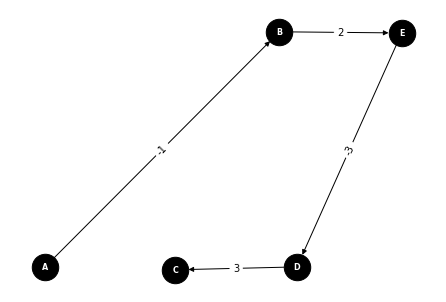

In [39]:
dessinerGraphe(arborescence)

## Question 2

Reproduction de l'exemple donné dans l'énoncé du projet

In [40]:
Ge = [8, {1, 2, 3, 4, 5, 6, 7, 8}, 13, {(1,2):1, (1,3):1, (2,3):1, (3,4):1, (4,5):1, (4,6):1, (4,7):1,(5,7):1,(6,5):1,(6,8):1,(7,1):1,(8,2):1, (8,3):1}]
Ge

[8,
 {1, 2, 3, 4, 5, 6, 7, 8},
 13,
 {(1, 2): 1,
  (1, 3): 1,
  (2, 3): 1,
  (3, 4): 1,
  (4, 5): 1,
  (4, 6): 1,
  (4, 7): 1,
  (5, 7): 1,
  (6, 5): 1,
  (6, 8): 1,
  (7, 1): 1,
  (8, 2): 1,
  (8, 3): 1}]

In [7]:
gloutonFas(Ge)

[4, 6, 5, 7, 1, 8, 2, 3]

## Question 3

G=  [6, {0, 1, 2, 3, 4, 5}, 12, {(0, 1): 8, (0, 4): 8, (2, 1): 7, (3, 4): 10, (1, 5): 10, (5, 4): 8, (1, 4): 1, (4, 2): 9, (2, 3): 0, (5, 0): -3, (1, 3): -3, (3, 5): -1}, 1]


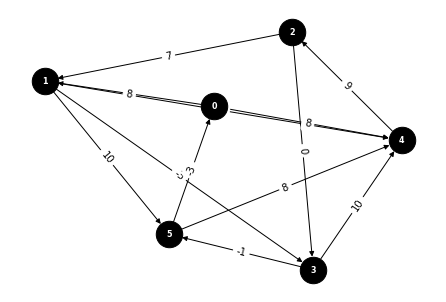

liste des Gi: 
[[6, {0, 1, 2, 3, 4, 5}, 12, {(0, 1): 5, (0, 4): 8, (2, 1): -2, (3, 4): 8, (1, 5): 3, (5, 4): 4, (1, 4): 2, (4, 2): 10, (2, 3): -1, (5, 0): -6, (1, 3): -1, (3, 5): 7}, 1], [6, {0, 1, 2, 3, 4, 5}, 12, {(0, 1): 4, (0, 4): 0, (2, 1): 2, (3, 4): 7, (1, 5): 10, (5, 4): 6, (1, 4): 0, (4, 2): 2, (2, 3): 7, (5, 0): -3, (1, 3): 2, (3, 5): 3}, 1], [6, {0, 1, 2, 3, 4, 5}, 12, {(0, 1): -8, (0, 4): -3, (2, 1): 4, (3, 4): -4, (1, 5): 10, (5, 4): 6, (1, 4): 3, (4, 2): 4, (2, 3): 10, (5, 0): 8, (1, 3): 7, (3, 5): -1}, 1]]
H=  [6, {0, 1, 2, 3, 4, 5}, 12, {(0, 1): 3, (0, 4): -8, (2, 1): 8, (3, 4): 8, (1, 5): 7, (5, 4): 5, (1, 4): -3, (4, 2): 9, (2, 3): 4, (5, 0): 0, (1, 3): 3, (3, 5): 1}, 1]


In [41]:
#Generer un graphe orienté G contenant une source qui permet d'atteindre au moins |V|/2 sommets et sans circuit négatif
G = genererGrapheValide(6, 0.4)
print("G= ", G)
dessinerGraphe(G[3])

# A partir de G construire les Gi ainsi que H en s'assurant qu'ils ne contiennent pas de circuit négatif
listGi = construire_listGi(G, 3)     ##Créer les 3 Gi
print("liste des Gi: ")
print(listGi)

H = construire_listGi(G, 1, borneInterval=10)[0]  #Créer H (le graphe de test) séparement
print("H= ", H)


## Question 4

Appliquer Bellman-Ford sur chaque Gi et determiner T l'union des arborescences de leurs plus courts chemins

T=  {(1, 5): 1, (4, 2): 1, (1, 4): 1, (5, 0): 1, (1, 3): 1, (3, 5): 1}


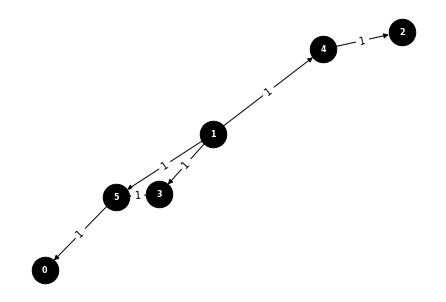

In [42]:
T = unionArborescence(listGi)

print('T= ',T)
dessinerGraphe(T)


## Question 5

Appliquer GloutonFas sur T l'union des arborescences précédemment créée

In [43]:
GrapheArbo = transformer_Arbo_Graphe(T)

ordre = gloutonFas(GrapheArbo)
print("Ordre total obtenu : ", ordre)

Ordre total obtenu :  [1, 3, 4, 2, 5, 0]


## Question 6

Application de Bellman ford sur H en utilisant l'ordre total

In [44]:
Resultat_Ordre_GloutonFas = bellmanFordOrdre(H, ordre)

print("Arborescence avec ordre total: ", Resultat_Ordre_GloutonFas[1])
print("Nombre d'iterations avec ordre total: ", Resultat_Ordre_GloutonFas[2])


Arborescence avec ordre total:  {(1, 3): 3, (0, 4): -8, (4, 2): 9, (3, 5): 1, (5, 0): 0}
Nombre d'iterations avec ordre total:  2


## Question 7


Application de Bellman ford sur H en utilisant un ordre aleatoire

In [45]:
source = ordre[0]    #Faire en sorte de commencer par la même source que pour l'ordre total

ordreAleatoire = getOrdreAleatoire(H, source)
print("Ordre aléatoire généré : ", ordreAleatoire)

resultat_Ordre_Aleatoire = bellmanFordOrdre(H, ordreAleatoire)

print("Arborescence avec ordre aléatoire :", resultat_Ordre_Aleatoire[1])
print("Nombre d'itérations avec ordre aléatoire :", resultat_Ordre_Aleatoire[2])


Ordre aléatoire généré :  [1, 5, 3, 4, 0, 2]
Arborescence avec ordre aléatoire : {(3, 5): 1, (1, 3): 3, (0, 4): -8, (5, 0): 0, (4, 2): 9}
Nombre d'itérations avec ordre aléatoire : 3


## Question 8

In [46]:
meilleur_resultat(Resultat_Ordre_GloutonFas[2], resultat_Ordre_Aleatoire[2])


Bellman Ford avec ordre total est meilleur qu'avec un ordre aleatoire


L'algorithme a convergé plus rapidement en utilisant en utilisant un ordre total qu'avec un ordre aleatoire, ce qui est l'objectif recherché.

## Question 9

### Initialisation des parametres

In [81]:
taille_max = 10 
tailles = range(4, taille_max+1, 1)   
probas = [0.2, 0.4, 0.8]
bornesIntervals = [10, 30, 50]
Ni = 3
list_Ni= range(2, 30+1, 4)



### Execution des tests

In [82]:
resultats_qst9 = comparer_ordre_total_aleatoire(tailles, probas, bornesIntervals, Ni)
if not os.path.exists("data"):
        os.makedirs("data")
with open('data/resultats_qst9.pickle', 'wb') as fichier_pickle:
    pickle.dump(resultats_qst9, fichier_pickle)


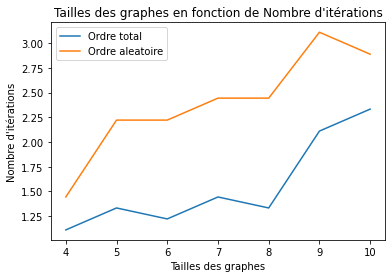

In [83]:
moyenne_tailles_Tot, moyenne_tailles_Al=get_moyenne_taille(tailles, probas, bornesIntervals, resultats_qst9)
plotGraphe(tailles,[moyenne_tailles_Tot, moyenne_tailles_Al], "Tailles des graphes", "Nombre d'itérations")


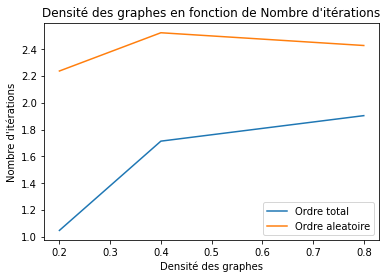

In [84]:
moyenne_probas_Tot, moyenne_probas_Al=get_moyenne_probas(tailles, probas, bornesIntervals, resultats_qst9)
plotGraphe(probas,[moyenne_probas_Tot, moyenne_probas_Al], "Densité des graphes", "Nombre d'itérations")



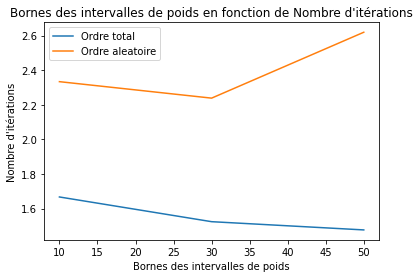

In [85]:
moyenne_bornesIntervals_Tot, moyenne_bornesIntervals_Al=get_moyenne_bornesIntervals(tailles, probas, bornesIntervals, resultats_qst9)
plotGraphe(bornesIntervals,[moyenne_bornesIntervals_Tot, moyenne_bornesIntervals_Al], "Bornes des intervalles de poids", "Nombre d'itérations")


# Question 10

### Tester sur un graphe de petite taille et de faible densité

G=  [5, {0, 1, 2, 3, 4}, 7, {(1, 2): -10, (3, 4): 2, (4, 1): 10, (3, 2): -8, (2, 0): 6, (4, 2): 5, (3, 0): -1}, 3]


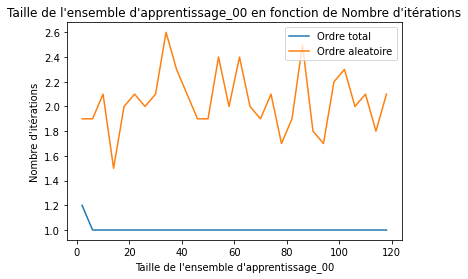

In [47]:
#Generer un graphe orienté G contenant une source qui permet d'atteindre au moins |V|/2 sommets et sans circuit négatif
G = genererGrapheValide(5, 0.4)
print("G= ", G)

Ni_max=120
borneInterval=10
list_Ni= range(2, Ni_max+1, 4)

list_k_ordre, list_k_aleatoire=eval_Ni(G, list_Ni, borneInterval)
plotGraphe(list_Ni,[list_k_ordre, list_k_aleatoire], "Taille de l'ensemble d'apprentissage_00", "Nombre d'itérations")


### Tester sur un graphe de petite taille et de forte densité

G=  [5, {0, 1, 2, 3, 4}, 10, {(0, 1): 4, (2, 4): 9, (1, 2): -3, (4, 0): 3, (4, 3): 4, (1, 4): -7, (3, 0): 10, (2, 3): -9, (0, 2): 0, (1, 3): 8}, 1]


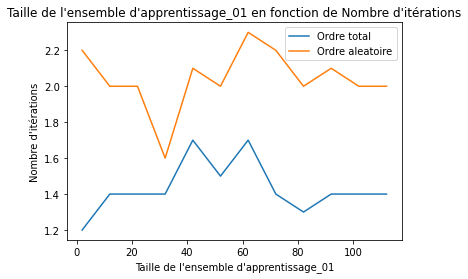

In [48]:
#Generer un graphe orienté G contenant une source qui permet d'atteindre au moins |V|/2 sommets et sans circuit négatif
G = genererGrapheValide(5, 0.8)
print("G= ", G)

Ni_max=120
borneInterval=10
list_Ni= range(2, Ni_max+1, 10)

list_k_ordre, list_k_aleatoire=eval_Ni(G, list_Ni, borneInterval)
plotGraphe(list_Ni,[list_k_ordre, list_k_aleatoire], "Taille de l'ensemble d'apprentissage_01", "Nombre d'itérations")


### Tester sur un graphe de grande taille et de faible densité 

G=  [9, {0, 1, 2, 3, 4, 5, 6, 7, 8}, 22, {(0, 7): 8, (0, 4): 3, (1, 5): 2, (4, 6): -3, (7, 3): 1, (8, 3): 6, (0, 5): -2, (1, 0): -3, (2, 5): 4, (4, 1): 0, (1, 3): 6, (3, 5): 0, (2, 8): 6, (4, 7): 3, (8, 1): -2, (8, 7): 5, (4, 2): 4, (0, 6): 0, (3, 0): 1, (4, 5): 3, (2, 6): 0, (4, 8): 3}, 4]


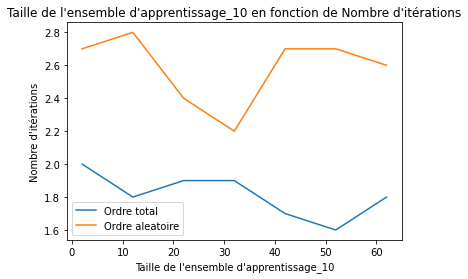

In [51]:
#Generer un graphe orienté G contenant une source qui permet d'atteindre au moins |V|/2 sommets et sans circuit négatif
G = genererGrapheValide(9, 0.4)
print("G= ", G)

Ni_max=70
borneInterval=10
list_Ni= range(2, Ni_max+1, 10)

list_k_ordre, list_k_aleatoire=eval_Ni(G, list_Ni, borneInterval)
plotGraphe(list_Ni,[list_k_ordre, list_k_aleatoire], "Taille de l'ensemble d'apprentissage_10", "Nombre d'itérations")


### Tester sur un graphe de grande taille et de forte densité

G=  [9, {0, 1, 2, 3, 4, 5, 6, 7, 8}, 35, {(4, 3): -3, (3, 1): -2, (3, 7): 4, (5, 1): -1, (5, 7): 10, (0, 2): 4, (0, 5): -3, (1, 6): 7, (0, 8): 3, (2, 5): 7, (2, 8): 8, (6, 8): -8, (4, 5): -2, (5, 6): 4, (3, 6): 1, (0, 1): 7, (0, 7): 0, (2, 4): 8, (1, 2): 8, (0, 4): -5, (2, 7): -2, (1, 8): 5, (6, 7): -3, (4, 7): -9, (3, 5): 3, (3, 8): 7, (8, 4): 10, (5, 8): -3, (8, 7): 10, (0, 3): 4, (1, 4): 10, (0, 6): 9, (2, 3): -2, (1, 7): -8, (2, 6): -4}, 0]


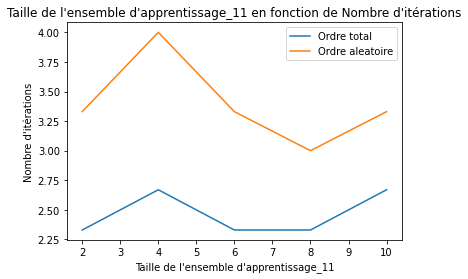

In [55]:
#Generer un graphe orienté G contenant une source qui permet d'atteindre au moins |V|/2 sommets et sans circuit négatif
G = genererGrapheValide(9, 0.8)
print("G= ", G)

Ni_max=10
borneInterval=10
list_Ni= range(2, Ni_max+1, 2)

list_k_ordre, list_k_aleatoire=eval_Ni(G, list_Ni, borneInterval)
plotGraphe(list_Ni,[list_k_ordre, list_k_aleatoire], "Taille de l'ensemble d'apprentissage_11", "Nombre d'itérations")


## Question 11

In [32]:
nb_niveaux = 100
Gn = genererGrapheNiveau(nb_niveaux)

Hn = construire_listGi(Gn, 1)[0]                   #Generer le graphe de test
k_ordre, source = get_nbIterations_ordre_total(Gn, Hn, 3)     #Récupérer le nombre d'itérations retourné par Bellman-Ford en utilisant l'ordre total, ainsi que la source utilisee
k_aleatoire = get_nbIterations_ordre_aleatoire(Hn, source) #Récupérer le nombre d'itérations retourné par Bellman-Ford en utilisant un ordre aléatoire

meilleur_resultat(k_ordre, k_aleatoire)


Bellman Ford avec ordre total est meilleur qu'avec un ordre aleatoire


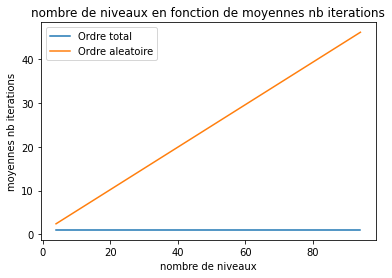

In [43]:
niveau_max = 100
niveaux = [i for i in range(4, niveau_max+1, 30)]

moyennes = get_moyenne_niveaux(niveaux)
plotGraphe(niveaux, moyennes, 'nombre de niveaux', 'moyennes nb iterations')


In [55]:
ao=round((moyennes[1][2]-moyennes[1][1])/(niveaux[2] - niveaux[1]),2)
print("Dans le cas de l'approche basée sur l'odre totale, la pente de la droite =",ao)

aa=round((moyennes[0][2]-moyennes[0][1])/(niveaux[2] - niveaux[1]),2)
print("Dans le cas de l'approche basée sur l'odre aléatoire, la pente de la droite =",aa)


Dans le cas de l'approche basée sur l'odre totale, la pente de la droite = 0.49
Dans le cas de l'approche basée sur l'odre aléatoire, la pente de la droite = 0.0
